### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")
import pickle
import json
import config

### Problem statement

In [2]:
# To predict car price

### data Gathering

In [3]:
file_path = config.CSV_FILE_PATH
df = pd.read_csv(file_path)
df

,make,model,year,mileage,hp,gear,fuel,price
0,Volkswagen,up,2019,31997,60,manual,gasoline,10190
1,Volkswagen,Polo,2022,100,95,manual,gasoline,24390
2,Volkswagen,Golf,2019,44607,116,manual,diesel,18630
3,Volkswagen,Tiguan,2019,42934,150,automatic,diesel,29990
4,Volkswagen,T6 Multivan,2021,10645,204,automatic,diesel,79890
...,...,...,...,...,...,...,...,...
144835,Volvo,XC 60,2022,0,197,automatic,gasoline,61900
144836,Volvo,XC 60,2022,0,197,automatic,diesel,61390
144837,Volvo,XC 60,2019,90321,235,automatic,diesel,34880
144838,Volvo,XC 60,2019,0,197,automatic,diesel,58990


In [4]:
df.replace({0:np.nan},inplace=True)
df

,make,model,year,mileage,hp,gear,fuel,price
0,Volkswagen,up,2019,31997.0,60,manual,gasoline,10190
1,Volkswagen,Polo,2022,100.0,95,manual,gasoline,24390
2,Volkswagen,Golf,2019,44607.0,116,manual,diesel,18630
3,Volkswagen,Tiguan,2019,42934.0,150,automatic,diesel,29990
4,Volkswagen,T6 Multivan,2021,10645.0,204,automatic,diesel,79890
...,...,...,...,...,...,...,...,...
144835,Volvo,XC 60,2022,NaN,197,automatic,gasoline,61900
144836,Volvo,XC 60,2022,NaN,197,automatic,diesel,61390
144837,Volvo,XC 60,2019,90321.0,235,automatic,diesel,34880
144838,Volvo,XC 60,2019,NaN,197,automatic,diesel,58990


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144840 entries, 0 to 144839
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   make     144840 non-null  object 
 1   model    144840 non-null  object 
 2   year     144840 non-null  int64  
 3   mileage  129221 non-null  float64
 4   hp       144840 non-null  int64  
 5   gear     144840 non-null  object 
 6   fuel     144840 non-null  object 
 7   price    144840 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 8.8+ MB


In [6]:
df.isna().sum()

make           0
model          0
year           0
mileage    15619
hp             0
gear           0
fuel           0
price          0
dtype: int64

In [7]:
df.select_dtypes(include="object")

,make,model,gear,fuel
0,Volkswagen,up,manual,gasoline
1,Volkswagen,Polo,manual,gasoline
2,Volkswagen,Golf,manual,diesel
3,Volkswagen,Tiguan,automatic,diesel
4,Volkswagen,T6 Multivan,automatic,diesel
...,...,...,...,...
144835,Volvo,XC 60,automatic,gasoline
144836,Volvo,XC 60,automatic,diesel
144837,Volvo,XC 60,automatic,diesel
144838,Volvo,XC 60,automatic,diesel


### Make

In [8]:
df["make"]

0         Volkswagen
1         Volkswagen
2         Volkswagen
3         Volkswagen
4         Volkswagen
             ...    
144835         Volvo
144836         Volvo
144837         Volvo
144838         Volvo
144839         Volvo
Name: make, Length: 144840, dtype: object

In [9]:
df['make'].value_counts()

Volkswagen       16551
Audi             13777
Mercedes-Benz    11416
Skoda            10927
BMW              10178
Ford             10068
Opel              9767
Renault           8915
Seat              8550
Hyundai           4302
CUPRA             4149
Volvo             3783
Kia               3024
Nissan            2912
Toyota            2571
Peugeot           2422
Dacia             2334
Mazda             2331
Citroën           2103
MINI              2038
Porsche           2024
Fiat              1594
Land              1584
Jaguar            1486
Jeep              1123
Suzuki             989
Mitsubishi         799
smart              756
Honda              501
Alfa               295
DS                 278
Abarth             233
Subaru             182
Ssangyong          170
Maserati           158
Lexus              105
Dodge              101
MG                  77
Aston               59
Tesla               54
Piaggio             49
ALPINA              32
Bentley             28
Cadillac   

In [10]:
df = pd.get_dummies(df,columns=["make"])
df

,model,year,mileage,hp,gear,fuel,price,make_ALPINA,make_Abarth,make_Alfa,...,make_Seat,make_Skoda,make_Ssangyong,make_Subaru,make_Suzuki,make_Tesla,make_Toyota,make_Volkswagen,make_Volvo,make_smart
0,up,2019,31997.0,60,manual,gasoline,10190,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Polo,2022,100.0,95,manual,gasoline,24390,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Golf,2019,44607.0,116,manual,diesel,18630,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Tiguan,2019,42934.0,150,automatic,diesel,29990,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,T6 Multivan,2021,10645.0,204,automatic,diesel,79890,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144835,XC 60,2022,NaN,197,automatic,gasoline,61900,0,0,0,...,0,0,0,0,0,0,0,0,1,0
144836,XC 60,2022,NaN,197,automatic,diesel,61390,0,0,0,...,0,0,0,0,0,0,0,0,1,0
144837,XC 60,2019,90321.0,235,automatic,diesel,34880,0,0,0,...,0,0,0,0,0,0,0,0,1,0
144838,XC 60,2019,NaN,197,automatic,diesel,58990,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
df["model"]

0                  up
1                Polo
2                Golf
3              Tiguan
4         T6 Multivan
             ...     
144835          XC 60
144836          XC 60
144837          XC 60
144838          XC 60
144839          XC 90
Name: model, Length: 144840, dtype: object

In [12]:
df["model"].value_counts() # Drop this column

Leon                      3527
Golf                      3107
Octavia                   2623
Ateca                     2616
Formentor                 2291
                          ... 
CLS 220 Shooting Brake       1
SL 350                       1
MR 2                         1
S60 CC                       1
428                          1
Name: model, Length: 730, dtype: int64

### Year

In [13]:
df["year"]

0         2019
1         2022
2         2019
3         2019
4         2021
          ... 
144835    2022
144836    2022
144837    2019
144838    2019
144839    2021
Name: year, Length: 144840, dtype: int64

<AxesSubplot: xlabel='year'>

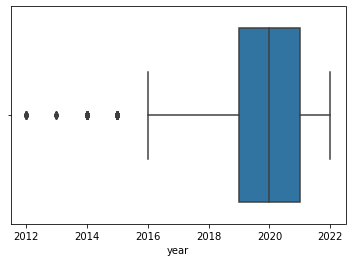

In [14]:
sns.boxplot(x = df["year"])

### mileage

In [15]:
df["mileage"]

0         31997.0
1           100.0
2         44607.0
3         42934.0
4         10645.0
           ...   
144835        NaN
144836        NaN
144837    90321.0
144838        NaN
144839        NaN
Name: mileage, Length: 144840, dtype: float64

In [16]:
df["mileage"].mean()

26813.994768652155

In [17]:
df["mileage"].median()

17976.0

<AxesSubplot: xlabel='mileage'>

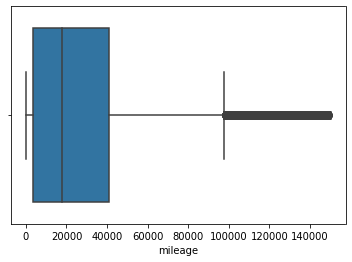

In [18]:
sns.boxplot(x = df["mileage"])

In [19]:
df["mileage"] = df["mileage"].fillna(df["mileage"].mean())
df["mileage"].isna().sum()

0

### hp

In [20]:
df["hp"]

0          60
1          95
2         116
3         150
4         204
         ... 
144835    197
144836    197
144837    235
144838    197
144839    235
Name: hp, Length: 144840, dtype: int64

### gear

In [21]:
df["gear"]

0            manual
1            manual
2            manual
3         automatic
4         automatic
            ...    
144835    automatic
144836    automatic
144837    automatic
144838    automatic
144839    automatic
Name: gear, Length: 144840, dtype: object

In [22]:
df["gear"].value_counts().to_dict()

{'automatic': 93454, 'manual': 51386}

In [23]:
df.replace({'automatic': 1, 'manual': 0},inplace=True)

### Fual

In [24]:
df["fuel"]

0         gasoline
1         gasoline
2           diesel
3           diesel
4           diesel
            ...   
144835    gasoline
144836      diesel
144837      diesel
144838      diesel
144839      diesel
Name: fuel, Length: 144840, dtype: object

In [25]:
df["fuel"].value_counts()

gasoline             84173
diesel               43608
Hybrid - gasoline    10649
electric              5326
hybrid - diesel        650
gas                    357
other                   77
Name: fuel, dtype: int64

In [26]:
df = pd.get_dummies(df,columns=["fuel"])
df

,model,year,mileage,hp,gear,price,make_ALPINA,make_Abarth,make_Alfa,make_Aston,...,make_Volkswagen,make_Volvo,make_smart,fuel_Hybrid - gasoline,fuel_diesel,fuel_electric,fuel_gas,fuel_gasoline,fuel_hybrid - diesel,fuel_other
0,up,2019,31997.000000,60,0,10190,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,Polo,2022,100.000000,95,0,24390,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Golf,2019,44607.000000,116,0,18630,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,Tiguan,2019,42934.000000,150,1,29990,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,T6 Multivan,2021,10645.000000,204,1,79890,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144835,XC 60,2022,26813.994769,197,1,61900,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
144836,XC 60,2022,26813.994769,197,1,61390,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
144837,XC 60,2019,90321.000000,235,1,34880,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
144838,XC 60,2019,26813.994769,197,1,58990,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144840 entries, 0 to 144839
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   model                   144840 non-null  object 
 1   year                    144840 non-null  int64  
 2   mileage                 144840 non-null  float64
 3   hp                      144840 non-null  int64  
 4   gear                    144840 non-null  int64  
 5   price                   144840 non-null  int64  
 6   make_ALPINA             144840 non-null  uint8  
 7   make_Abarth             144840 non-null  uint8  
 8   make_Alfa               144840 non-null  uint8  
 9   make_Aston              144840 non-null  uint8  
 10  make_Audi               144840 non-null  uint8  
 11  make_BMW                144840 non-null  uint8  
 12  make_Bentley            144840 non-null  uint8  
 13  make_CUPRA              144840 non-null  uint8  
 14  make_Cadillac       

### Model training

In [28]:
x = df.drop(["model","price"],axis=1)
y = df["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.2)


In [29]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

### Evaluation

In [30]:
# Evaluation on training data
y_train_pred = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print("MAE :",mae)

r_squared = r2_score(y_train,y_train_pred)
print("R2  :",r_squared)

MSE : 176868558.68547443
RMSE : 13299.19391111636
MAE : 7035.39745164988
R2  : 0.7201041034816946


In [31]:
# Evaluation on testing data
y_test_pred = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print("MAE :",mae)

r_squared = r2_score(y_test,y_test_pred)
print("R2  :",r_squared)

MSE : 171041737.8652278
RMSE : 13078.292620416007
MAE : 6990.478484328626
R2  : 0.7239785500424667


In [32]:
project_data = ({"gear":{'automatic': 1, 'manual': 0},
                "columns": x.columns.tolist()})
project_data

{'gear': {'automatic': 1, 'manual': 0},
 'columns': ['year',
  'mileage',
  'hp',
  'gear',
  'make_ALPINA',
  'make_Abarth',
  'make_Alfa',
  'make_Aston',
  'make_Audi',
  'make_BMW',
  'make_Bentley',
  'make_CUPRA',
  'make_Cadillac',
  'make_Citroën',
  'make_DS',
  'make_Dacia',
  'make_Dodge',
  'make_Fiat',
  'make_Ford',
  'make_Honda',
  'make_Hyundai',
  'make_Infiniti',
  'make_Jaguar',
  'make_Jeep',
  'make_Kia',
  'make_Lada',
  'make_Land',
  'make_Lexus',
  'make_MG',
  'make_MINI',
  'make_Maserati',
  'make_Mazda',
  'make_Mercedes-Benz',
  'make_Mitsubishi',
  'make_Nissan',
  'make_Opel',
  'make_Peugeot',
  'make_Piaggio',
  'make_Polestar',
  'make_Porsche',
  'make_Renault',
  'make_Seat',
  'make_Skoda',
  'make_Ssangyong',
  'make_Subaru',
  'make_Suzuki',
  'make_Tesla',
  'make_Toyota',
  'make_Volkswagen',
  'make_Volvo',
  'make_smart',
  'fuel_Hybrid - gasoline',
  'fuel_diesel',
  'fuel_electric',
  'fuel_gas',
  'fuel_gasoline',
  'fuel_hybrid - diesel'

### User input data

In [35]:
df1 = pd.read_csv(file_path)
df1.head(1).T

,0
make,Volkswagen
model,up
year,2019
mileage,31997
hp,60
gear,manual
fuel,gasoline
price,10190


In [36]:
year     = 2012
mileage  = 31997
hp       = 60
gear     = "manual"
fuel     = "gasoline"
make     = "Volkswagen"

gear = project_data["gear"][gear]

fuel = "fuel_"+fuel
fuel_index = project_data["columns"].index(fuel)

make = "make_"+make
make_index = project_data["columns"].index(make)

test_array = np.zeros(x.shape[1])
test_array[0] = year
test_array[1] = mileage
test_array[2] = hp
test_array[3] = gear
test_array[make_index]  = 1
test_array[fuel_index]  = 1
print(test_array)

predicted_price = np.around(linear_reg_model.predict([test_array])[0],3)
print("Predicted Price :",predicted_price)

[2.0120e+03 3.1997e+04 6.0000e+01 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]
Predicted Price : 7352.646


In [37]:
with open ("linear_reg.pkl","wb") as f:
    pickle.dump(linear_reg_model,f)

In [38]:
with open ("project_data.json","w") as f:
    json.dump(project_data,f)